<a href="https://colab.research.google.com/github/BMateusSs/Projeto-PISI3/blob/main/modelo_gmm_nao_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "winemag-data-130k-v2.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zynicide/wine-reviews",
  file_path
)

/tmp/ipython-input-2-1525670069.py:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Limpeza dos dados

In [3]:
initial_lines_quantity = len(df['description'])
print(initial_lines_quantity)
df.head()
df.dropna(axis="index", how= "any", subset=["price", "points", "region_1", "country", "variety", "designation"], inplace=True)
final_lines_quantity = len(df["description"])
print(final_lines_quantity)

129971
70175


In [4]:
import nltk
from nltk.corpus import stopwords
import string

try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['description'] = df['description'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
3,3,US,pineapple rind lemon pith orange blossom start...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,much like regular bottling 2012 comes across r...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,blackberry raspberry aromas show typical navar...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,heres bright informal red opens aromas candied...,Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,9,France,great depth flavor fresh apple pear fruits tou...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [10]:
from sentence_transformers import SentenceTransformer

os.environ["OMP_NUM_THREADS"] = "16"
os.environ["TOKENIZERS_PARALLELISM"] = "true"

model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

embeddings = model.encode(
    df['description'].tolist(),
    show_progress_bar=True,
    batch_size=128,
    device='cpu'
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/549 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [9]:
import numpy as np
def write_numpy_file(write_path, content):
    np.save(write_path, content)

def read_numpy_file(read_path):
    return np.load(read_path)

import numpy as np
import pandas as pd

def write_embeddings_csv(write_path: str, embeddings_array: np.ndarray):
    """Salva um array numpy de embeddings em um arquivo CSV."""
    df_embeddings = pd.DataFrame(embeddings_array)
    df_embeddings.to_csv(write_path, index=False)
    print(f"Embeddings salvos como CSV em: {write_path}")


def read_embeddings_csv(read_path: str) -> np.ndarray:
    """Lê embeddings de um arquivo CSV e retorna como um array numpy."""
    df_embeddings = pd.read_csv(read_path)
    embeddings_array = df_embeddings.values
    print(f"Embeddings lidos de CSV: {read_path}")
    return embeddings_array


In [ ]:
write_numpy_file(write_path=embeddings_path, content=embeddings)

NameError: name 'embeddings_path' is not defined

In [ ]:
embeddings_path = "embeddings_paraphrase_multilingual_mpnet_base_v2.npy"
embeddings = read_numpy_file(embeddings_path)
len(embeddings)

FileNotFoundError: [Errno 2] No such file or directory: 'embeddings_paraphrase_multilingual_mpnet_base_v2.npy'

In [7]:
def umap_fit_transform(embeddings, **kwargs):
    import umap
    reducer = umap.UMAP(**kwargs)
    umap_2d = reducer.fit_transform(embeddings)
    return umap_2d
def tsne_fit_transform(embeddings, **kwargs):
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_2d = tsne.fit_transform(embeddings)
    return tsne_2d


In [8]:
embeddings_2d = umap_fit_transform(embeddings, random_state=42)
len(embeddings_2d)


NameError: name 'embeddings' is not defined

In [ ]:
write_numpy_file("emdebddings_2d.npy", embeddings_2d)

NameError: name 'embeddings_2d' is not defined

In [6]:
import numpy as np
import pandas as pd
import gdown
import os

def read_embeddings_csv(read_path: str) -> np.ndarray:
    """Lê embeddings de um arquivo CSV e retorna como um array numpy."""
    df_embeddings = pd.read_csv(read_path)
    embeddings_array = df_embeddings.values
    print(f"Embeddings lidos de CSV: {read_path}")
    return embeddings_array

drive_link = "https://drive.google.com/file/d/11-6rZ7TXr5Gato7iIkBHv8XYy5ScNqMx/view?usp=sharing"


drive_file_id = drive_link.split('/d/')[1].split('/view')[0]

download_url = f"https://drive.google.com/uc?id={drive_file_id}"

output_csv_path = "downloaded_embeddings_2d.csv"

print(f"Tentando baixar o arquivo do Google Drive ID: {drive_file_id}")

try:
    gdown.download(download_url, output_csv_path, quiet=False)
    print(f"Arquivo baixado com sucesso para {output_csv_path}")

    embeddings_2d = read_embeddings_csv(output_csv_path)

    print(f"Dados carregados na variável embeddings_2d. Forma: {embeddings_2d.shape}")

except Exception as e:
    print(f"Ocorreu um erro durante o download ou carregamento do CSV: {e}")
    print("Por favor, verifique se o link do Google Drive está correto e o arquivo é acessível (compartilhado).")

print(len(embeddings_2d))

Tentando baixar o arquivo do Google Drive ID: 11-6rZ7TXr5Gato7iIkBHv8XYy5ScNqMx


Downloading...
From: https://drive.google.com/uc?id=11-6rZ7TXr5Gato7iIkBHv8XYy5ScNqMx
To: /content/downloaded_embeddings_2d.csv
100%|██████████| 1.43M/1.43M [00:00<00:00, 147MB/s]

Arquivo baixado com sucesso para downloaded_embeddings_2d.csv
Embeddings lidos de CSV: downloaded_embeddings_2d.csv
Dados carregados na variável embeddings_2d. Forma: (70175, 2)
70175


# Usando o GMM para gerar os clusters

In [13]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

print("Iniciando a busca pelo número ideal de clusters com GMM...")
n_components_range = range(2, 21)
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42, n_init=10)
    gmm.fit(embeddings_2d)
    bic_scores.append(gmm.bic(embeddings_2d))

melhor_n_clusters = np.argmin(bic_scores) + n_components_range.start
print(f"\nO número ideal de clusters encontrado (menor BIC) foi: {melhor_n_clusters}")

print(f"Treinando o modelo GMM final com {melhor_n_clusters} clusters...")
gmm_final = GaussianMixture(n_components=melhor_n_clusters, random_state=42, n_init=10)
clusters_gmm = gmm_final.fit_predict(embeddings_2d)

df['cluster_gmm'] = clusters_gmm

n_clusters_found = len(set(clusters_gmm))

print(f"\nNúmero de clusters encontrados pelo GMM: {n_clusters_found}")
print("\nContagem de pontos por cluster:")
print(df['cluster_gmm'].value_counts().sort_index())

Iniciando a busca pelo número ideal de clusters com GMM...

O número ideal de clusters encontrado (menor BIC) foi: 20
Treinando o modelo GMM final com 20 clusters...

Número de clusters encontrados pelo GMM: 20

Contagem de pontos por cluster:
cluster_gmm
0     5325
1     5821
2     3994
3     2848
4     1455
5     1710
6     1244
7     4098
8     7847
9     3075
10    4528
11    1301
12    4490
13    5663
14    3785
15    2110
16    1854
17    2947
18    3427
19    2653
Name: count, dtype: int64


Iniciando a visualização dos clusters do GMM...
OK: Variáveis 'embeddings_2d' e 'cluster_gmm' encontradas. Prosseguindo para o gráfico.


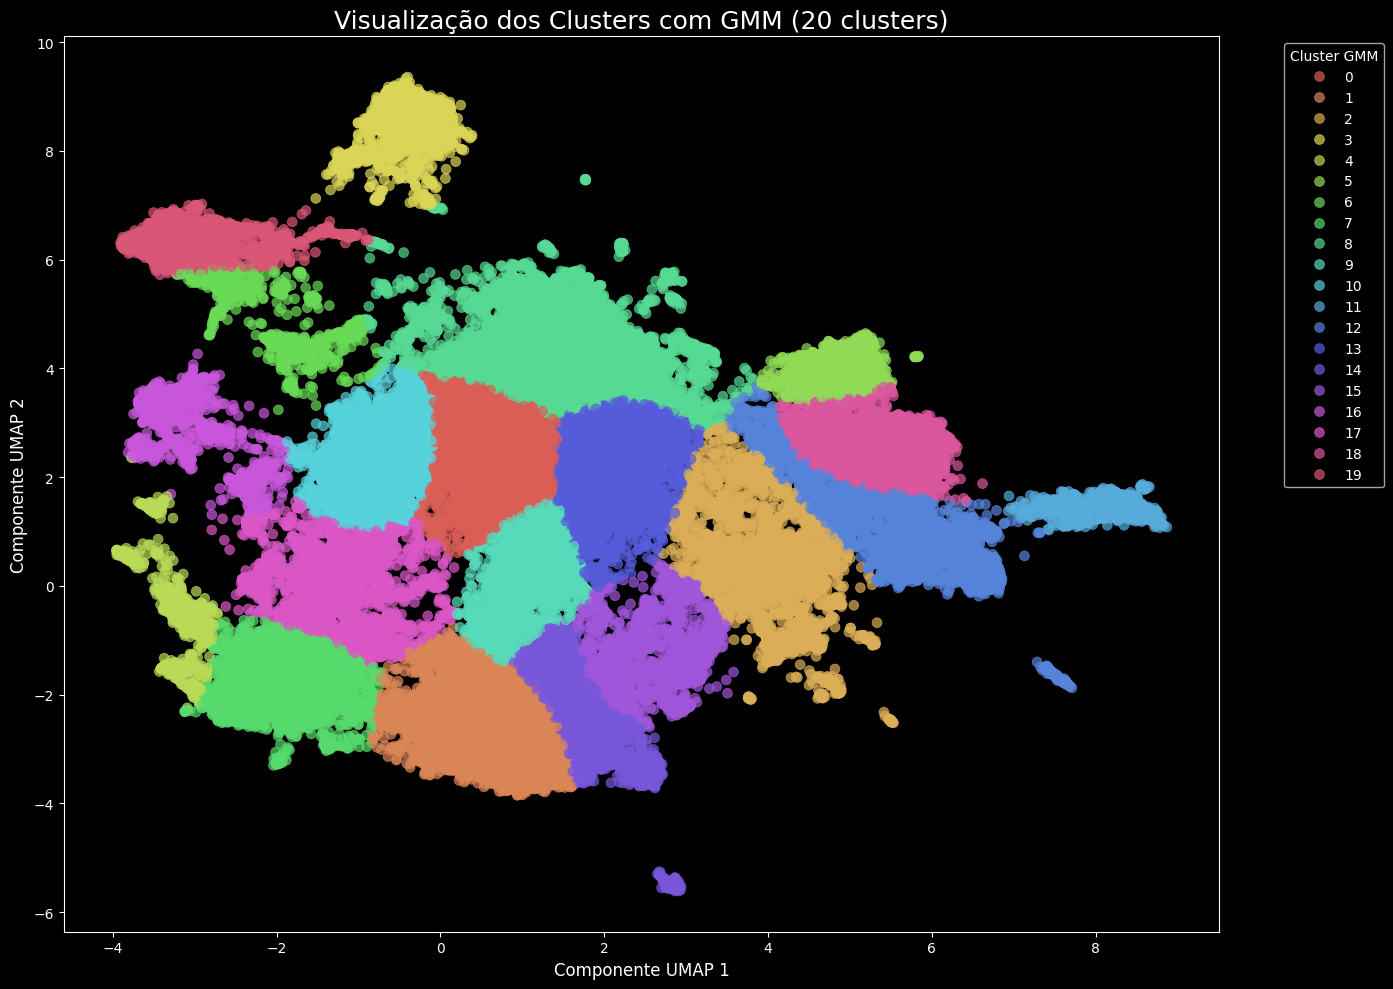

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("Iniciando a visualização dos clusters do GMM...")

try:
    assert 'embeddings_2d' in locals() and embeddings_2d.shape[1] == 2

    assert 'df' in locals() and 'cluster_gmm' in df.columns

    print("OK: Variáveis 'embeddings_2d' e 'cluster_gmm' encontradas. Prosseguindo para o gráfico.")

except AssertionError:
    print("\n--- ERRO ANTES DE PLOTAR ---")
    print("Uma das variáveis necessárias para o gráfico não foi encontrada.")
    print("Verifique se as células que criam 'embeddings_2d' (do UMAP) e 'df['cluster_gmm']' (do GMM) foram executadas com sucesso.")

else:

    plt.style.use('dark_background')
    plt.figure(figsize=(14, 10))

    n_clusters_found = df['cluster_gmm'].nunique()
    palette = sns.color_palette("hls", n_clusters_found)

    sns.scatterplot(
        x=embeddings_2d[:, 0],
        y=embeddings_2d[:, 1],
        hue=df['cluster_gmm'],
        palette=palette,
        s=50,
        alpha=0.7,
        edgecolor=None
    )

    plt.title(f'Visualização dos Clusters com GMM ({n_clusters_found} clusters)', fontsize=18)
    plt.xlabel('Componente UMAP 1', fontsize=12)
    plt.ylabel('Componente UMAP 2', fontsize=12)
    plt.legend(title='Cluster GMM', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Analisando dados dos Clusters

In [21]:
100 * (len(df[df["cluster_gmm"]==0]) / len(df))



7.588172426077663

In [22]:
df_sem_cluster_0 = df[df['cluster_gmm'] != 0].copy()


print(f"Número de linhas no DataFrame original: {len(df)}")
print(f"Número de linhas no DataFrame sem o Cluster 0: {len(df_sem_cluster_0)}")

print("\nPrimeiras 5 linhas do DataFrame sem o Cluster 0:")
display(df_sem_cluster_0.head())

Número de linhas no DataFrame original: 70175
Número de linhas no DataFrame sem o Cluster 0: 64850

Primeiras 5 linhas do DataFrame sem o Cluster 0:


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,cluster_gmm
3,3,US,pineapple rind lemon pith orange blossom start...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,7
4,4,US,much like regular bottling 2012 comes across r...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,8
5,5,Spain,blackberry raspberry aromas show typical navar...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,1
6,6,Italy,heres bright informal red opens aromas candied...,Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,14
9,9,France,great depth flavor fresh apple pear fruits tou...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,17


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_cluster_numerical_distribution_with_mpl_table(
    df: pd.DataFrame,
    numerical_col: str,
    cluster_col: str = 'cluster_gmm',
    y_limit: tuple = None,
    figsize: tuple = (12, 8)
):
    """
    Gera um box plot mostrando a distribuição de uma coluna numérica
    entre diferentes clusters e plota a média de cada cluster.
    Também exibe uma tabela com estatísticas dentro do gráfico.
    """
    if cluster_col not in df.columns or numerical_col not in df.columns:
        print(f"Erro: Uma das colunas ('{cluster_col}' ou '{numerical_col}') não foi encontrada no DataFrame.")
        return

    sns.set_theme(style="whitegrid")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, gridspec_kw={'height_ratios': [3, 1]})

    sns.boxplot(x=cluster_col, y=numerical_col, data=df, palette="viridis", ax=ax1)
    mean_by_cluster = df.groupby(cluster_col)[numerical_col].mean().reset_index()
    mean_by_cluster.columns = [cluster_col, f'mean_{numerical_col}']

    for i, cluster_id in enumerate(sorted(df[cluster_col].unique())):
        mean_value = mean_by_cluster[mean_by_cluster[cluster_col] == cluster_id][f'mean_{numerical_col}'].iloc[0]
        ax1.plot(sorted(df[cluster_col].unique()).index(cluster_id), mean_value,
                 marker='D', color='red', markersize=10, label='Mean' if i == 0 else "")

    if y_limit:
        ax1.set_ylim(y_limit)
        ax1.set_title(f"Distribuição de '{numerical_col}' por Cluster (Zoom)", fontsize=16)
    else:
        ax1.set_title(f"Distribuição de '{numerical_col}' por Cluster", fontsize=16)

    ax1.set_xlabel("Cluster")
    ax1.set_ylabel(numerical_col.capitalize())
    ax1.legend()

    stats_table_df = df.groupby(cluster_col)[numerical_col].agg(['mean', 'median', 'std']).reset_index()
    stats_table_df.columns = ['Cluster', 'Mean', 'Median', 'Std Dev']

    ax2.axis('off')
    table = ax2.table(
        cellText=stats_table_df.values.round(2),
        colLabels=stats_table_df.columns,
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-24-2629558235.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_col, y=numerical_col, data=df, palette="viridis", ax=ax1)


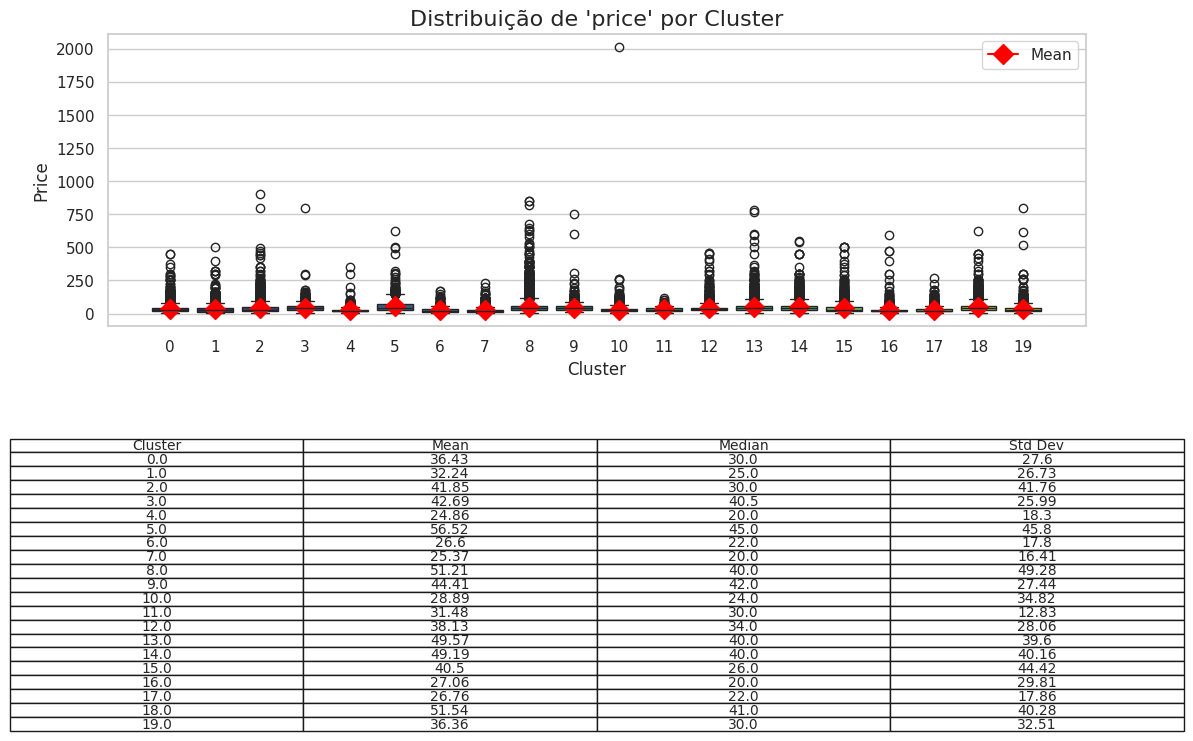

/tmp/ipython-input-24-2629558235.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_col, y=numerical_col, data=df, palette="viridis", ax=ax1)


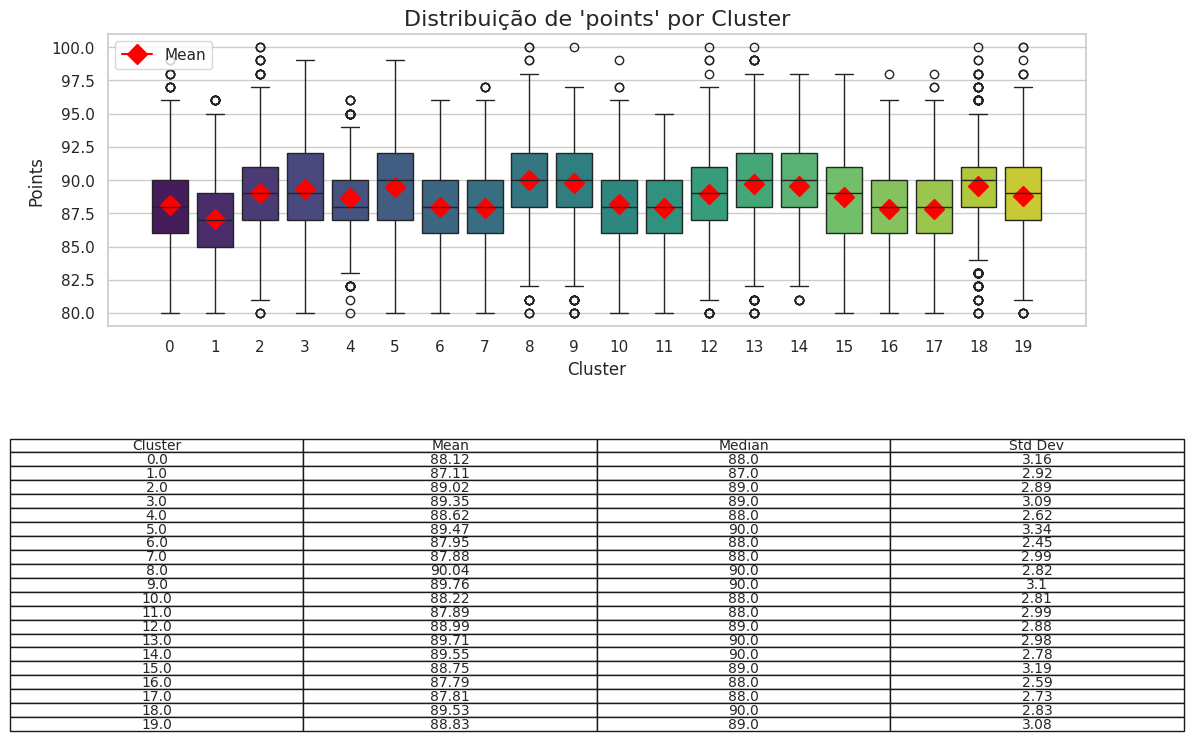

In [25]:
plot_cluster_numerical_distribution_with_mpl_table(
    df=df,
    numerical_col='price',
    cluster_col='cluster_gmm'
)

plot_cluster_numerical_distribution_with_mpl_table(
    df=df,
    numerical_col='points',
    cluster_col='cluster_gmm'
)

/tmp/ipython-input-24-2629558235.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_col, y=numerical_col, data=df, palette="viridis", ax=ax1)


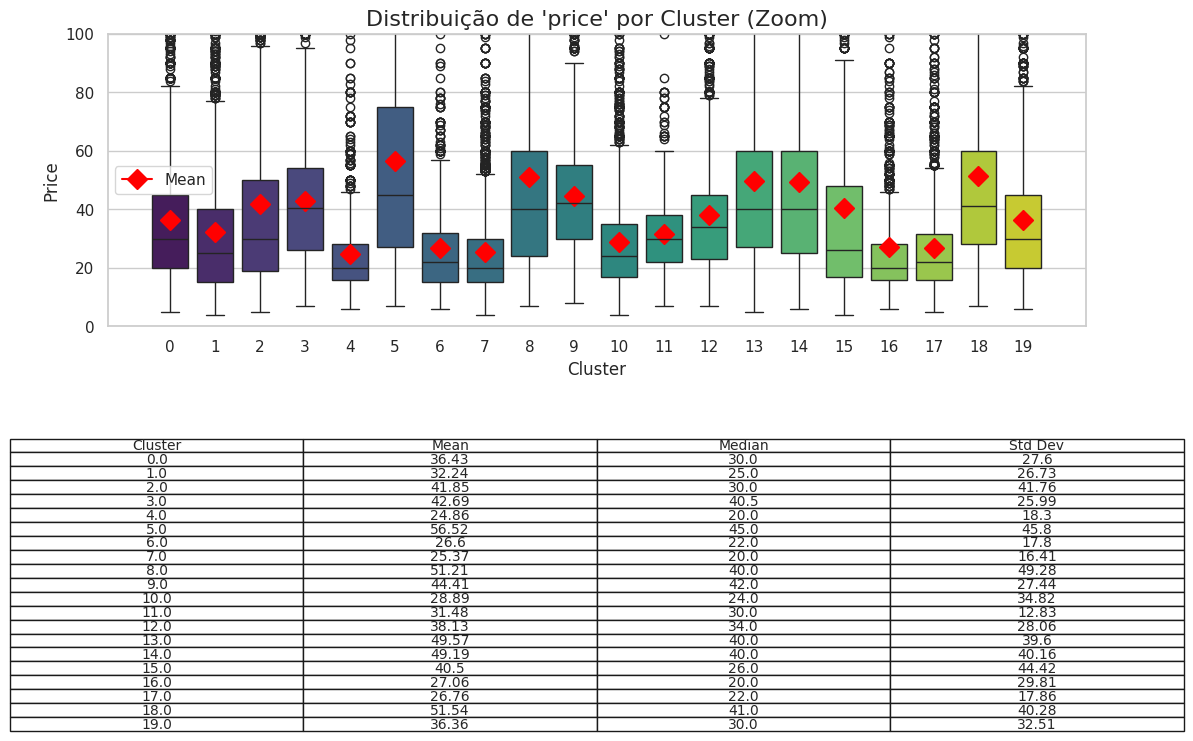

In [26]:
plot_cluster_numerical_distribution_with_mpl_table(
    df=df,
    numerical_col='price',
    cluster_col='cluster_gmm',
    y_limit=(0, 100)
)

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

def plot_top_n_heatmap_per_cluster_normalized_by_row(
    dataframe: pd.DataFrame,
    col: str,
    cluster_col: str = 'cluster_gmm',
    n: int = 10
):
    """Gera um mapa de calor com distribuição percentual por cluster."""
    if cluster_col not in dataframe.columns or col not in dataframe.columns:
        print(f"ERRO: Coluna '{cluster_col}' ou '{col}' não encontrada.")
        return

    if n is not None:
        top_entries = dataframe[col].value_counts().nlargest(n).index
        title_prefix = f'Top {n} {col.capitalize()}'
        figsize_height = n * 0.5 + 2
        df_top = dataframe[dataframe[col].isin(top_entries)]
    else:
        top_entries = dataframe[col].unique()
        title_prefix = f'Todos os {col.capitalize()}es'
        figsize_height = len(top_entries) * 0.5 + 2
        df_top = dataframe.copy()

    pivot_table = pd.crosstab(df_top[col], df_top[cluster_col])

    if n is not None:
        pivot_table = pivot_table.loc[top_entries]

    row_sums = pivot_table.sum(axis=1)
    row_sums[row_sums == 0] = 1
    pivot_table_normalized = pivot_table.div(row_sums, axis=0) * 100

    plt.figure(figsize=(15, figsize_height))
    sns.heatmap(
        pivot_table_normalized,
        annot=True, fmt='.1f', cmap='coolwarm', linewidths=.5,
        cbar_kws={'label': f'% de cada {col.capitalize()} por Cluster'}
    )
    plt.title(f'Distribuição Percentual de {title_prefix} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col.capitalize())
    plt.show()

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

def test_categorical_cluster_association(
    df: pd.DataFrame,
    category_col: str,
    cluster_col: str = 'cluster_gmm',
    n_top_categories: int = 10,
    alpha: float = 0.05
):
    """Realiza um teste qui-quadrado de independência."""
    if cluster_col not in df.columns or category_col not in df.columns:
        print(f"ERRO: Coluna '{cluster_col}' ou '{category_col}' não encontrada.")
        return None, None, None, None, None, category_col

    if n_top_categories is not None:
        top_categories = df[category_col].value_counts().nlargest(n_top_categories).index
        df_filtered = df[df[category_col].isin(top_categories)].copy()
    else:
        df_filtered = df.copy()

    if len(df_filtered) == 0 or df_filtered[category_col].nunique() < 2 or df_filtered[cluster_col].nunique() < 2:
        print(f"Dados insuficientes para realizar o teste para '{category_col}'.")
        return None, None, None, None, None, category_col

    contingency_table = pd.crosstab(df_filtered[category_col], df_filtered[cluster_col])

    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"\nTeste Qui-Quadrado para '{category_col}' e Clusters:")
    print(f"Valor p: {p:.4f}")
    if p < alpha:
        print(f"-> Resultado: Associação estatisticamente significativa encontrada.")
    else:
        print(f"-> Resultado: Nenhuma associação estatisticamente significativa encontrada.")

    return chi2, p, dof, expected, contingency_table, category_col

--- Gerando Heatmap para a coluna 'country' ---


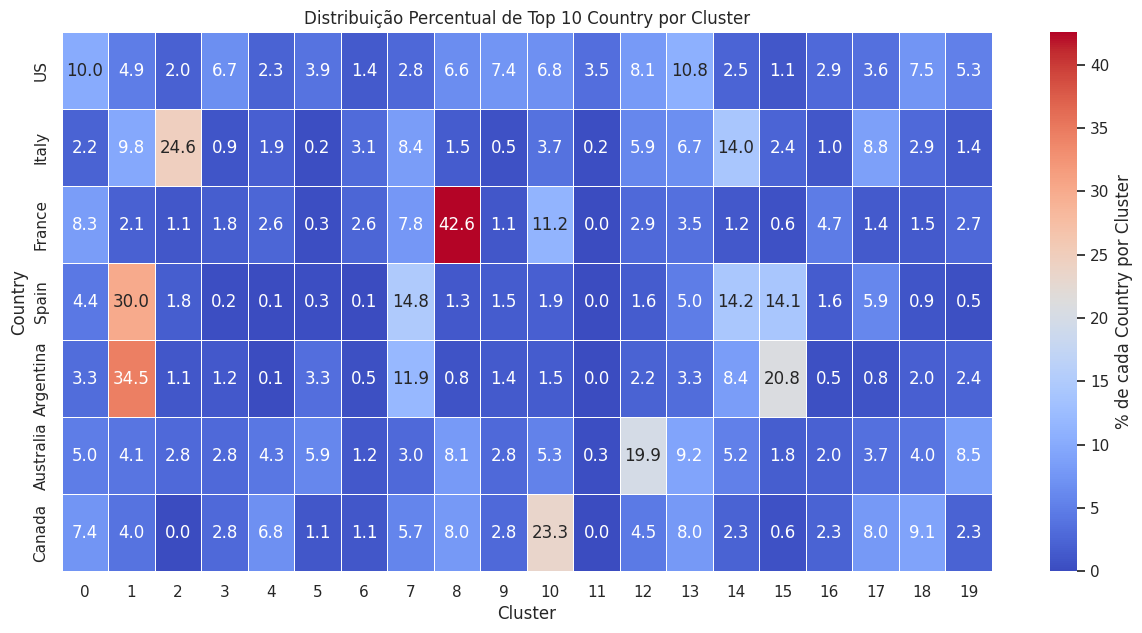


--- Realizando Teste Qui-Quadrado para a coluna 'country' ---

Teste Qui-Quadrado para 'country' e Clusters:
Valor p: 0.0000
-> Resultado: Associação estatisticamente significativa encontrada.


(np.float64(51801.120404360816),
 np.float64(0.0),
 114,
 array([[2.14062344e+02, 2.34001297e+02, 1.60556808e+02, 1.14488180e+02,
         5.84902743e+01, 6.87411471e+01, 5.00081796e+01, 1.64737556e+02,
         3.15445486e+02, 1.23613466e+02, 1.82023342e+02, 5.22995511e+01,
         1.80495761e+02, 2.27649776e+02, 1.52155112e+02, 8.48209476e+01,
         7.45298753e+01, 1.18467930e+02, 1.37763691e+02, 1.06649277e+02],
        [1.22624866e+02, 1.34046826e+02, 9.19744068e+01, 6.55841539e+01,
         3.35059494e+01, 3.93781261e+01, 2.86470110e+01, 9.43693338e+01,
         1.80701845e+02, 7.08115426e+01, 1.04271436e+02, 2.99596152e+01,
         1.03396366e+02, 1.30408379e+02, 8.71615248e+01, 4.85893837e+01,
         4.26941788e+01, 6.78639401e+01, 7.89174492e+01, 6.10936658e+01],
        [1.33551835e+01, 1.45991592e+01, 1.00170146e+01, 7.14282864e+00,
         3.64916281e+00, 4.28870680e+00, 3.11997150e+00, 1.02778482e+01,
         1.96803990e+01, 7.71214820e+00, 1.13562950e+01, 3.262928

In [29]:
dataframe_para_analise = df

print("--- Gerando Heatmap para a coluna 'country' ---")
plot_top_n_heatmap_per_cluster_normalized_by_row(
    dataframe=dataframe_para_analise,
    col='country',
    cluster_col='cluster_gmm',
    n=10
)

print("\n--- Realizando Teste Qui-Quadrado para a coluna 'country' ---")
test_categorical_cluster_association(
    df=dataframe_para_analise,
    category_col='country',
    cluster_col='cluster_gmm',
    n_top_categories=10
)

In [31]:
test_categorical_cluster_association(
    df=df_sem_cluster_0,
    category_col="country",
    cluster_col="cluster_gmm"
)


Teste Qui-Quadrado para 'country' e Clusters:
Valor p: 0.0000
-> Resultado: Associação estatisticamente significativa encontrada.


(np.float64(49830.60695638963),
 np.float64(0.0),
 108,
 array([[2.44957733e+02, 1.68074418e+02, 1.19848759e+02, 6.12289129e+01,
         7.19597533e+01, 5.23496685e+01, 1.72450918e+02, 3.30215312e+02,
         1.29401311e+02, 1.90546060e+02, 5.47483269e+01, 1.88946955e+02,
         2.38308820e+02, 1.59279337e+02, 8.87924441e+01, 7.80195220e+01,
         1.24014850e+02, 1.44214079e+02, 1.11642822e+02],
        [1.37872876e+02, 9.45995991e+01, 6.74560987e+01, 3.44622976e+01,
         4.05020817e+01, 2.94646723e+01, 9.70628836e+01, 1.85859553e+02,
         7.28326908e+01, 1.07247618e+02, 3.08147417e+01, 1.06347571e+02,
         1.34130578e+02, 8.96493446e+01, 4.99762529e+01, 4.39127833e+01,
         6.98009561e+01, 8.11699614e+01, 6.28374402e+01],
        [1.46310409e+01, 1.00388897e+01, 7.15842714e+00, 3.65713184e+00,
         4.29807247e+00, 3.12678489e+00, 1.03002930e+01, 1.97233770e+01,
         7.72898998e+00, 1.13810948e+01, 3.27005397e+00, 1.12855821e+01,
         1.42339090e+01, 

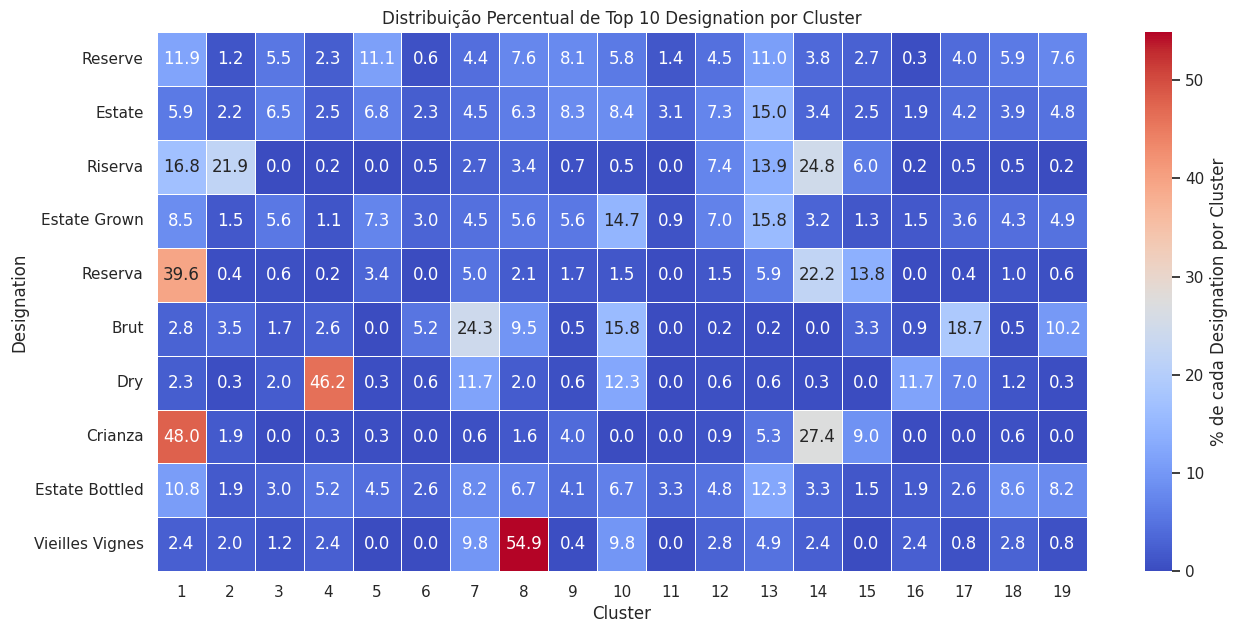

In [32]:
plot_top_n_heatmap_per_cluster_normalized_by_row(
    dataframe=df_sem_cluster_0,
    col='designation',
    cluster_col='cluster_gmm'
)

In [33]:
print("--- Realizando Teste Qui-Quadrado para a coluna 'designation' ---")
test_categorical_cluster_association(
    df=df,
    category_col='designation',
    cluster_col='cluster_gmm',
    n_top_categories=10
)

--- Realizando Teste Qui-Quadrado para a coluna 'designation' ---

Teste Qui-Quadrado para 'designation' e Clusters:
Valor p: 0.0000
-> Resultado: Associação estatisticamente significativa encontrada.


(np.float64(6797.48734949272),
 np.float64(0.0),
 171,
 array([[ 34.45478849,  53.92923416,  14.70797295,  14.63988048,
          17.77213398,  21.51721969,   5.78785973,  25.39849033,
          30.84588772,  19.6106306 ,  28.73502123,   4.69838025,
          18.04450385,  40.58311055,  32.07155213,  15.32080516,
           6.12832206,  16.61456204,  13.82277088,  18.31687372],
        [ 26.89542381,  42.09718509,  11.48105048,  11.42789747,
          13.872936  ,  16.79635163,   4.51800598,  19.82607328,
          24.0783142 ,  15.30806731,  22.43057084,   3.66755779,
          14.08554804,  31.67919484,  25.03506841,  11.95942758,
           4.78377103,  12.9693348 ,  10.79006133,  14.29816009],
        [ 27.92986319,  43.7163076 ,  11.92262934,  11.86743199,
          14.40651046,  17.44236515,   4.69177544,  20.58861456,
          25.00440321,  15.89683913,  23.29328511,   3.80861771,
          14.62729989,  32.89762541,  25.99795565,  12.41940557,
           4.96776223,  13.468155


--- Gerando Heatmap para a coluna 'variety' (sem o cluster 0) ---


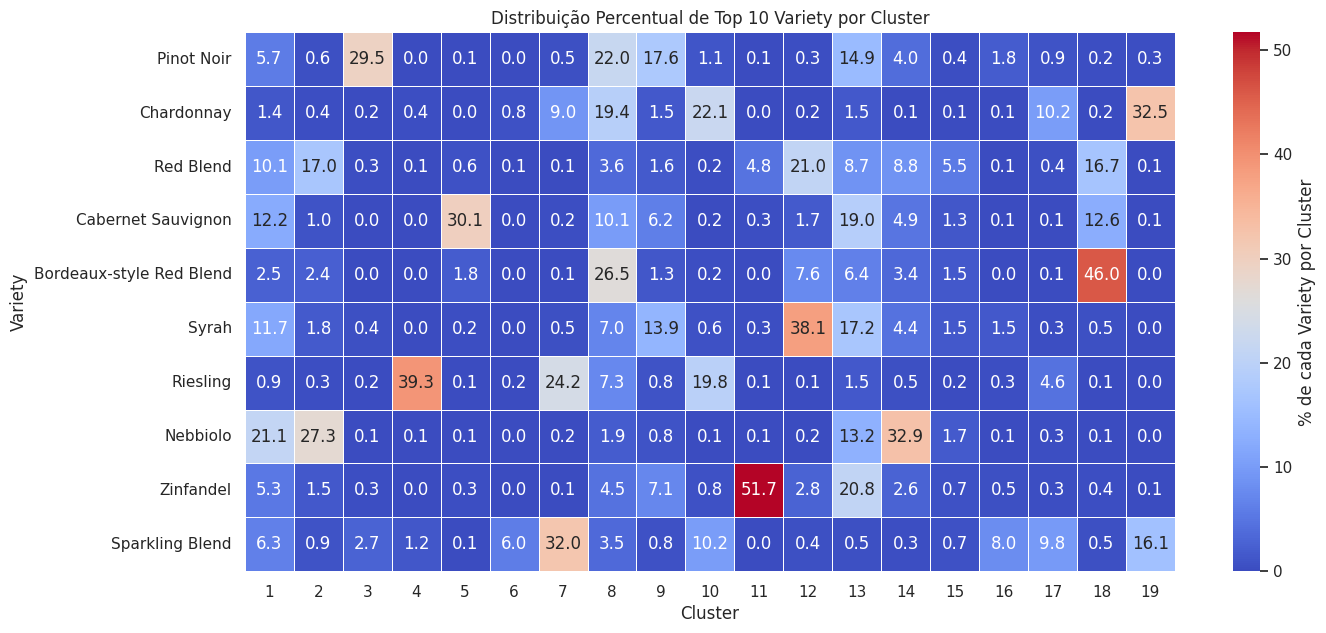

In [34]:
print("\n--- Gerando Heatmap para a coluna 'variety' (sem o cluster 0) ---")
plot_top_n_heatmap_per_cluster_normalized_by_row(
    dataframe=df_sem_cluster_0,
    col='variety',
    cluster_col='cluster_gmm'
)

In [35]:
print("--- Realizando Teste Qui-Quadrado para a coluna 'variety' ---")
test_categorical_cluster_association(
    df=df,
    category_col='variety',
    cluster_col='cluster_gmm',
    n_top_categories=15
)

--- Realizando Teste Qui-Quadrado para a coluna 'variety' ---

Teste Qui-Quadrado para 'variety' e Clusters:
Valor p: 0.0000
-> Resultado: Associação estatisticamente significativa encontrada.


(np.float64(139483.97368737217),
 np.float64(0.0),
 266,
 array([[ 218.75287655,  217.85335303,  112.55288071,  135.37829009,
           49.64245438,   83.54324712,   45.93191985,  115.53255238,
          316.40739893,  138.69528308,  159.83408585,   69.15087077,
          149.03980358,  232.58305071,  134.98474855,   73.19872662,
           67.23938328,   83.2059258 ,  163.65706082,  134.81608789],
        [ 393.70660203,  392.08765943,  202.57019205,  243.65086036,
           89.34539439,  150.3592934 ,   82.6672562 ,  207.93293939,
          569.46305736,  249.62071118,  287.66586213,  124.4562119 ,
          268.23855101,  418.59784441,  242.94257298,  131.74145357,
          121.01595889,  149.75218993,  294.54636816,  242.63902124],
        [ 534.90016854,  532.70063045,  275.21720314,  331.0304821 ,
          121.38700818,  204.28209983,  112.31391357,  282.50317305,
          773.68752211,  339.14127879,  390.83042384,  169.08949044,
          364.43596679,  568.71806662,  330.


--- Gerando Heatmap para a coluna 'taster_name' (sem o cluster 0) ---


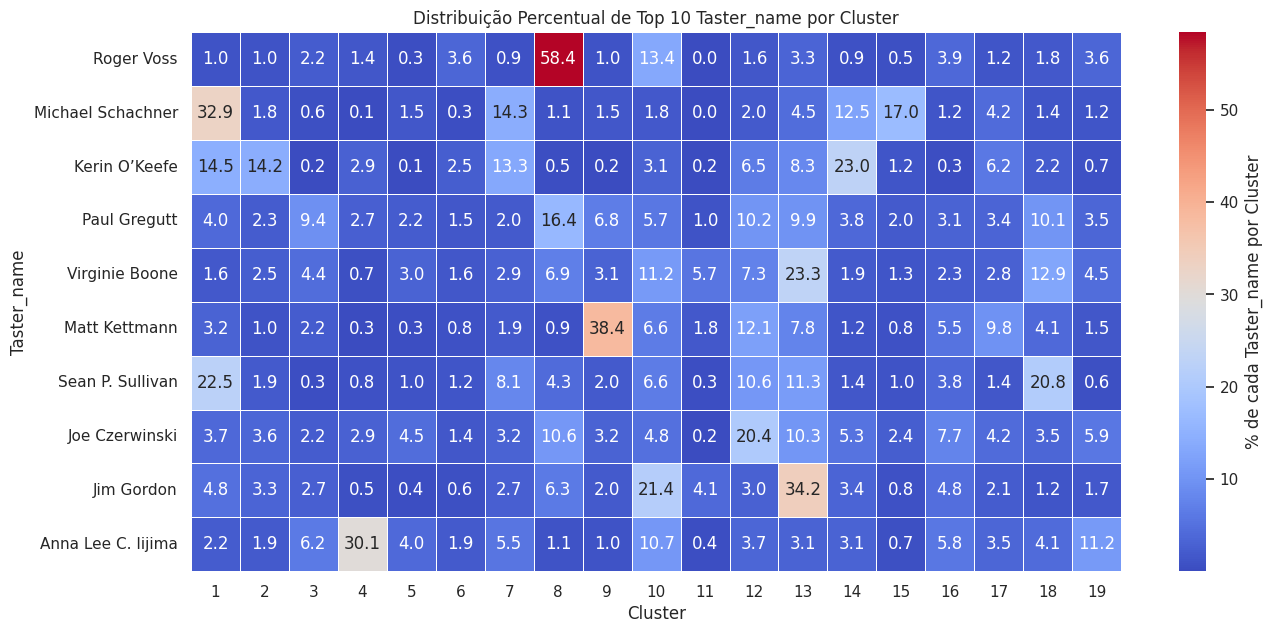

In [36]:
print("\n--- Gerando Heatmap para a coluna 'taster_name' (sem o cluster 0) ---")
plot_top_n_heatmap_per_cluster_normalized_by_row(
    dataframe=df_sem_cluster_0,
    col='taster_name',
    cluster_col='cluster_gmm'
)

In [37]:
print("--- Realizando Teste Qui-Quadrado para a coluna 'taster_twitter_handle' ---")
test_categorical_cluster_association(
    df=df,
    category_col='taster_twitter_handle',
    cluster_col='cluster_gmm',
    n_top_categories=10
)

--- Realizando Teste Qui-Quadrado para a coluna 'taster_twitter_handle' ---

Teste Qui-Quadrado para 'taster_twitter_handle' e Clusters:
Valor p: 0.0000
-> Resultado: Associação estatisticamente significativa encontrada.


(np.float64(67307.16750459601),
 np.float64(0.0),
 171,
 array([[  96.74773305,  114.14186132,   39.04015456,   28.89926409,
           18.2354129 ,   13.50602901,   17.73518961,   80.67237529,
          156.79726607,   60.14048271,   81.24081086,   12.96033087,
           70.66790936,  106.20650084,   73.60103687,   40.40439991,
           31.49133027,   41.63222073,   60.48154405,   26.39814761],
        [ 193.90856488,  228.77109182,   78.24700491,   57.92192385,
           36.54868837,   27.0697268 ,   35.5461059 ,  161.68920992,
          314.26403371,  120.53775655,  162.82850818,   25.97600047,
          141.63756044,  212.86648803,  147.51633949,   80.98132075,
           63.11712394,   83.44220501,  121.22133551,   52.90901148],
        [ 219.10759014,  258.50061164,   88.41544824,   65.44905924,
           41.29830489,   30.58752257,   40.16543368,  182.7012291 ,
          355.10362906,  136.20201549,  183.98858275,   29.35166307,
          160.04380497,  240.52915477,  166.6


--- Gerando Heatmap para a coluna 'region_1' (sem o cluster 0) ---


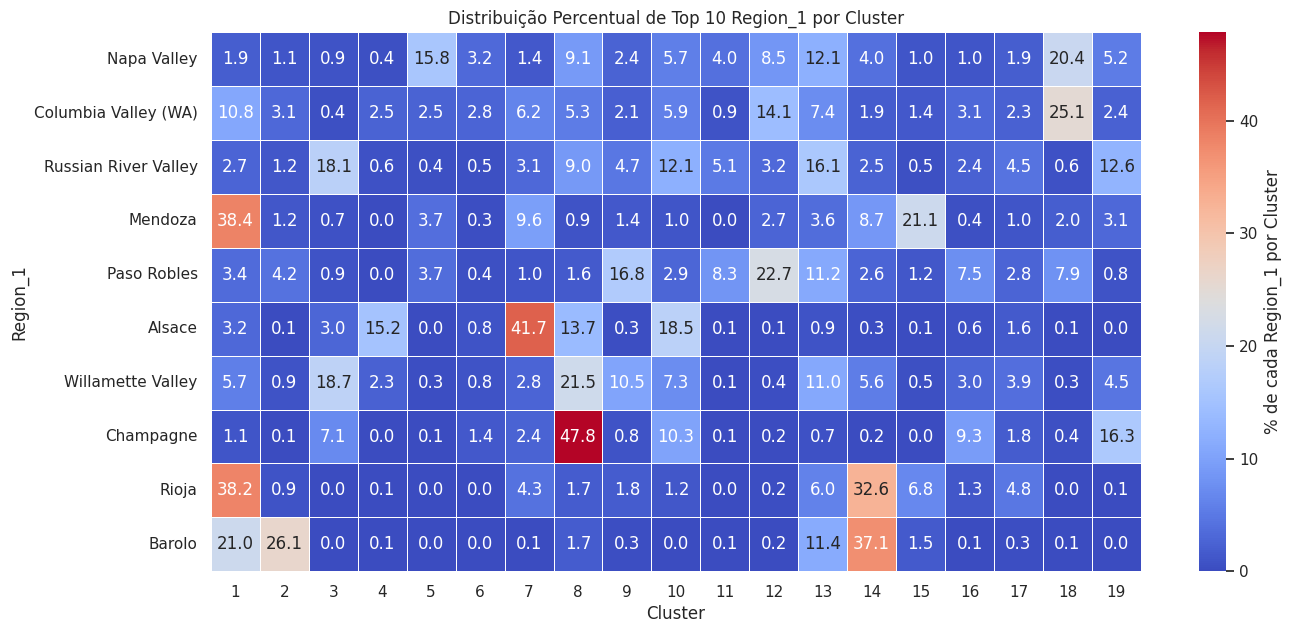

In [38]:
print("\n--- Gerando Heatmap para a coluna 'region_1' (sem o cluster 0) ---")
plot_top_n_heatmap_per_cluster_normalized_by_row(
    dataframe=df_sem_cluster_0,
    col='region_1',
    cluster_col='cluster_gmm'
)

In [39]:
print("--- Realizando Teste Qui-Quadrado para a coluna 'region_1' ---")
test_categorical_cluster_association(
    df=df,
    category_col='region_1',
    cluster_col='cluster_gmm',
    n_top_categories=10
)

--- Realizando Teste Qui-Quadrado para a coluna 'region_1' ---

Teste Qui-Quadrado para 'region_1' e Clusters:
Valor p: 0.0000
-> Resultado: Associação estatisticamente significativa encontrada.


(np.float64(24474.290369147457),
 np.float64(0.0),
 171,
 array([[134.62820728, 153.27452625,  24.53463022,  78.60003354,
          31.9396277 ,  54.06540332,  20.96595673, 107.59550562,
         153.27452625,  63.07630387, 112.5916485 ,  37.56028845,
          97.60321986, 123.92218682,  78.24316619,  48.62317625,
          44.51920174,  43.18094919, 114.28676841,  73.51467382],
        [104.34529599, 118.79736151,  19.01587568,  60.91995081,
          24.7552127 ,  41.90407513,  16.24993012,  83.39325843,
         118.79736151,  48.88808765,  87.2655822 ,  29.11157695,
          75.64861088,  96.04745933,  60.64335625,  37.68600816,
          34.50517078,  33.46794119,  88.57940634,  56.97847839],
        [116.57655543, 132.72267874,  21.2448991 ,  68.0609313 ,
          27.65699592,  46.8160322 ,  18.15473196,  93.16853933,
         132.72267874,  54.61870423,  97.49477332,  32.52400917,
          84.51607133, 107.306054  ,  67.75191458,  42.10352731,
          38.54983509,  37.3910

Calculando V de Cramer contra a coluna 'cluster_gmm'...
- V de Cramer para 'country': 0.3508
- V de Cramer para 'designation': 0.7465
- V de Cramer para 'variety': 0.4225
- V de Cramer para 'taster_twitter_handle': 0.3173
- V de Cramer para 'region_1': 0.3674


/tmp/ipython-input-40-73099661.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='V_de_Cramer', y='Característica', data=df_v_scores, palette='viridis')


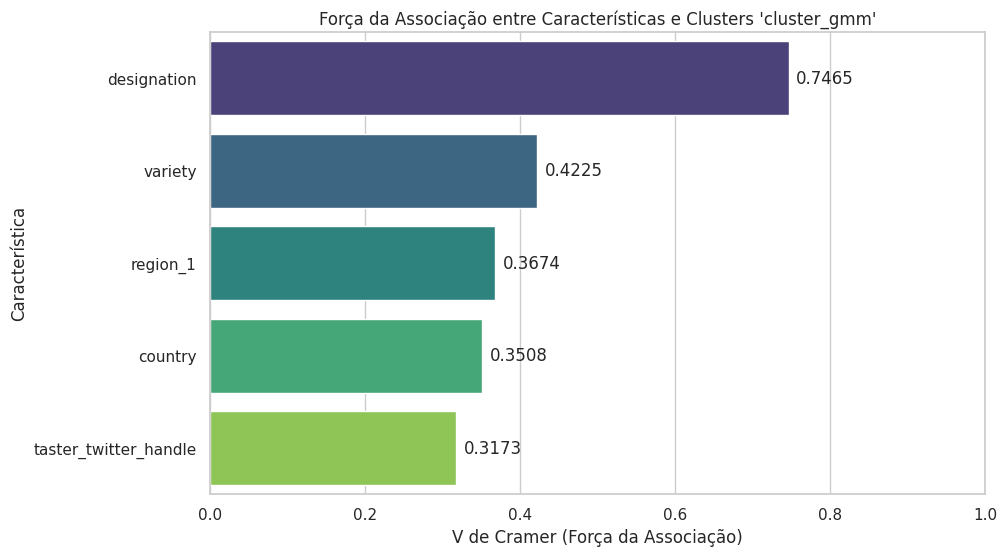

In [40]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def cramers_v(contingency_table):
    """Calcula o V de Cramer, uma medida de associação."""
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    if n == 0 or min_dim == 0:
        return 0.0
    v = np.sqrt(chi2 / (n * min_dim))
    return v

def calculate_and_plot_cramers_v(
    df: pd.DataFrame,
    categorical_cols: list,
    cluster_col: str = 'cluster_gmm'
):
    """
    Calcula o V de Cramer para uma lista de colunas categóricas contra
    a coluna de cluster e plota os resultados.
    """
    v_scores = {}
    print(f"Calculando V de Cramer contra a coluna '{cluster_col}'...")

    for col in categorical_cols:
        if col not in df.columns:
            print(f"- Aviso: Coluna '{col}' não encontrada. Pulando.")
            continue

        contingency_table = pd.crosstab(df[col], df[cluster_col])
        v_score = cramers_v(contingency_table)
        v_scores[col] = v_score
        print(f"- V de Cramer para '{col}': {v_score:.4f}")

    if not v_scores:
        print("Nenhuma pontuação calculada. Encerrando.")
        return

    df_v_scores = pd.DataFrame(list(v_scores.items()), columns=['Característica', 'V_de_Cramer'])
    df_v_scores = df_v_scores.sort_values('V_de_Cramer', ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='V_de_Cramer', y='Característica', data=df_v_scores, palette='viridis')
    plt.xlabel("V de Cramer (Força da Associação)")
    plt.ylabel("Característica")
    plt.title(f"Força da Associação entre Características e Clusters '{cluster_col}'")
    plt.xlim(0, 1)
    for p in ax.patches:
        ax.text(p.get_width() + 0.01, p.get_y() + p.get_height() / 2, f"{p.get_width():.4f}", va='center')
    plt.show()

df_para_analise = df

colunas_para_testar = ['country', 'designation', 'variety', 'taster_twitter_handle', 'region_1']

calculate_and_plot_cramers_v(
    df=df_para_analise,
    categorical_cols=colunas_para_testar,
    cluster_col='cluster_gmm'
)

In [41]:
from collections import Counter

def get_top_n_words(corpus, n=None):
    """Retorna as N palavras mais comuns de um corpus de texto."""
    words = [word for sentence in corpus for word in sentence.split()]
    word_counts = Counter(words)
    return word_counts.most_common(n)

print("--- Analisando as Top 20 palavras mais comuns para cada cluster ---")
for cluster_id in sorted(df['cluster_gmm'].unique()):
    print(f"\n>>> Top palavras para o Cluster {cluster_id}:")

    cluster_descriptions = df[df['cluster_gmm'] == cluster_id]['description']

    top_words = get_top_n_words(cluster_descriptions, n=20)
    print(top_words)

--- Analisando as Top 20 palavras mais comuns para cada cluster ---

>>> Top palavras para o Cluster 0:
[('wine', 5651), ('flavors', 2721), ('fruit', 2043), ('acidity', 1497), ('oak', 1333), ('aromas', 1306), ('cherry', 1270), ('finish', 1212), ('red', 1045), ('palate', 1006), ('ripe', 995), ('texture', 929), ('light', 776), ('drink', 774), ('black', 734), ('soft', 718), ('rich', 636), ('fresh', 625), ('dry', 593), ('raspberry', 579)]

>>> Top palavras para o Cluster 1:
[('aromas', 4078), ('flavors', 3862), ('palate', 3043), ('finish', 2887), ('berry', 2048), ('fruit', 1933), ('cherry', 1913), ('tannins', 1783), ('plum', 1767), ('nose', 1409), ('oak', 1350), ('spice', 1293), ('black', 1292), ('notes', 1262), ('raspberry', 923), ('acidity', 920), ('red', 879), ('lead', 849), ('vanilla', 812), ('ripe', 769)]

>>> Top palavras para o Cluster 2:
[('wine', 2242), ('aromas', 1862), ('cherry', 1619), ('fruit', 1505), ('spice', 1270), ('tannins', 1179), ('black', 1175), ('palate', 1165), ('fla

In [42]:
print(len(embeddings))

NameError: name 'embeddings' is not defined

# Fazendo uma segunda analise para o cluster 1


--- Gerando gráfico para o cluster isolado ---


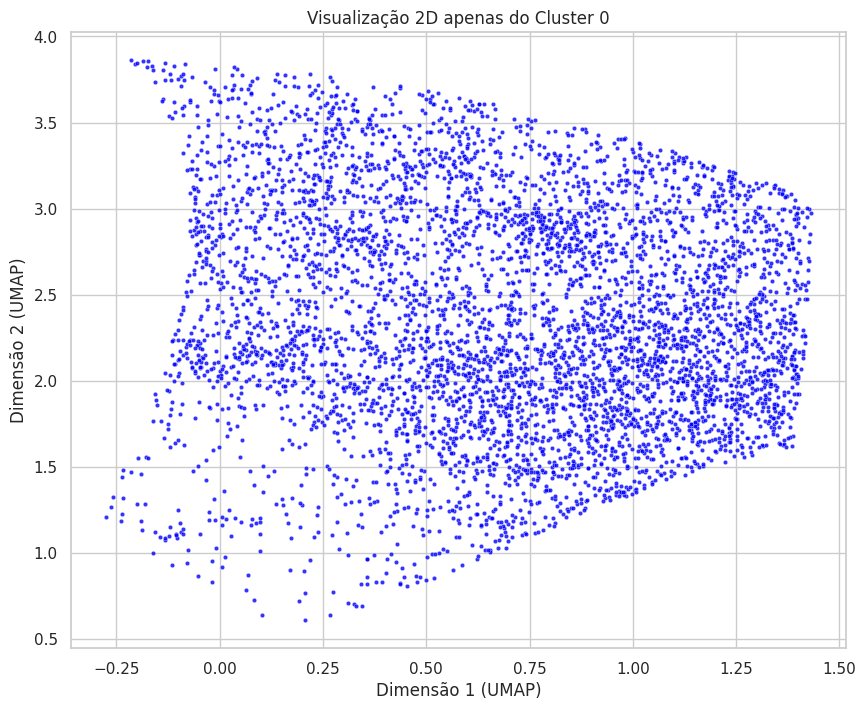

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_para_isolar = 0

print("\n--- Gerando gráfico para o cluster isolado ---")
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=df_cluster_0,
    x='umap_x',
    y='umap_y',
    color='blue',
    s=10,
    alpha=0.8
)

plt.title(f'Visualização 2D apenas do Cluster {cluster_para_isolar}')
plt.xlabel('Dimensão 1 (UMAP)')
plt.ylabel('Dimensão 2 (UMAP)')
plt.grid(True)


legend = plt.gca().get_legend()
if legend is not None:
    legend.set_visible(False)

plt.show()

--- Focando no Cluster 0 para reclusterizar com GMM ---
Número de pontos a serem reclusterizados: 5325

Buscando o número ideal de SUB-clusters com BIC...
  Testando n_sub_components=2, BIC=15582.31
  Testando n_sub_components=3, BIC=15027.83
  Testando n_sub_components=4, BIC=14909.57
  Testando n_sub_components=5, BIC=14820.39
  Testando n_sub_components=6, BIC=14743.85
  Testando n_sub_components=7, BIC=14660.69
  Testando n_sub_components=8, BIC=14634.44
  Testando n_sub_components=9, BIC=14629.15
  Testando n_sub_components=10, BIC=14560.35
-> Número ideal de sub-clusters encontrado: 10

Treinando o modelo de sub-cluster com 10 componentes...
Sub-clusterização com GMM concluída.


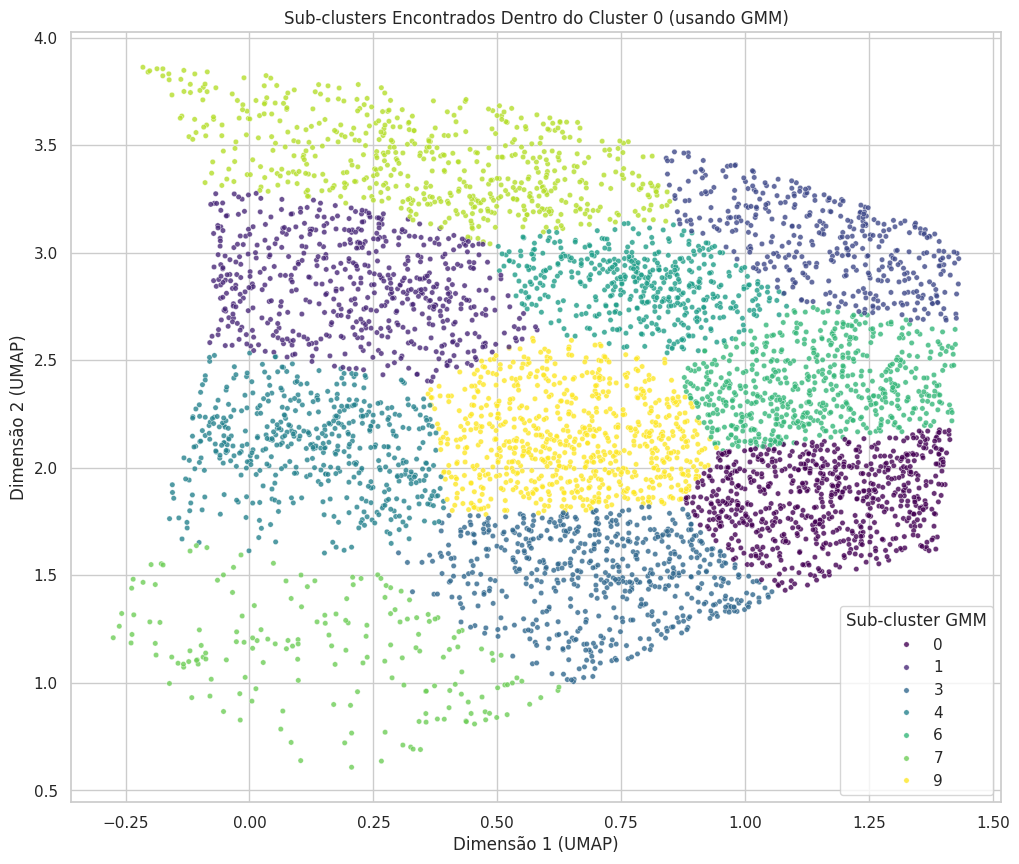

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

cluster_para_reclusterizar = 0
print(f"--- Focando no Cluster {cluster_para_reclusterizar} para reclusterizar com GMM ---")

df_cluster_foco = df[df['cluster_gmm'] == cluster_para_reclusterizar].copy()

embeddings_2d_foco = df_cluster_foco[['umap_x', 'umap_y']].values

print(f"Número de pontos a serem reclusterizados: {len(df_cluster_foco)}")

print("\nBuscando o número ideal de SUB-clusters com BIC...")
n_components_range_sub = range(2, 11)
bic_scores_sub = []
for n_components in n_components_range_sub:
    gmm_sub = GaussianMixture(n_components=n_components, random_state=42, n_init=10)
    gmm_sub.fit(embeddings_2d_foco)
    bic_scores_sub.append(gmm_sub.bic(embeddings_2d_foco))
    print(f"  Testando n_sub_components={n_components}, BIC={bic_scores_sub[-1]:.2f}")

melhor_n_sub_clusters = np.argmin(bic_scores_sub) + n_components_range_sub.start
print(f"-> Número ideal de sub-clusters encontrado: {melhor_n_sub_clusters}")

print(f"\nTreinando o modelo de sub-cluster com {melhor_n_sub_clusters} componentes...")
gmm_final_sub = GaussianMixture(n_components=melhor_n_sub_clusters, random_state=42, n_init=10)
sub_clusters = gmm_final_sub.fit_predict(embeddings_2d_foco)

df_cluster_foco['sub_cluster_gmm'] = sub_clusters
print("Sub-clusterização com GMM concluída.")


plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_cluster_foco,
    x='umap_x',
    y='umap_y',
    hue='sub_cluster_gmm',
    palette='viridis',
    s=15,
    alpha=0.8
)

plt.title(f'Sub-clusters Encontrados Dentro do Cluster {cluster_para_reclusterizar} (usando GMM)')
plt.xlabel('Dimensão 1 (UMAP)')
plt.ylabel('Dimensão 2 (UMAP)')
plt.legend(title='Sub-cluster GMM')
plt.grid(True)
plt.show()

### Não dá para usar clusterização no Sub Cluster 0 ele é muito coeso

## Análise de Sub-Clusters: Aplicando GMM no Maior Cluster do GMM


*   Descrição:

Vamos isolar o maior cluster encontrado pelo nosso modelo GMM principal.

Em seguida, aplicaremos um novo modelo GMM exclusivamente a este subconjunto de dados...

Utilizaremos o critério BIC para determinar automaticamente o número ideal de sub-clusters...

--- Encontrando o maior cluster do resultado do GMM ---
O maior cluster é o 8, com 7847 pontos.
DataFrame filtrado para o Cluster 8 criado.

--- Aplicando um novo GMM para encontrar sub-clusters ---
Buscando o número ideal de sub-clusters com BIC...
-> O número ideal de sub-clusters encontrado foi: 10
Treinando o modelo de sub-cluster com 10 componentes...

Rótulos de sub-cluster adicionados ao DataFrame.

Contagem de pontos por sub-cluster:


,count
gmm_sub_cluster,
0,898
1,765
2,459
3,1354
4,387
5,1187
6,995
7,304
8,170


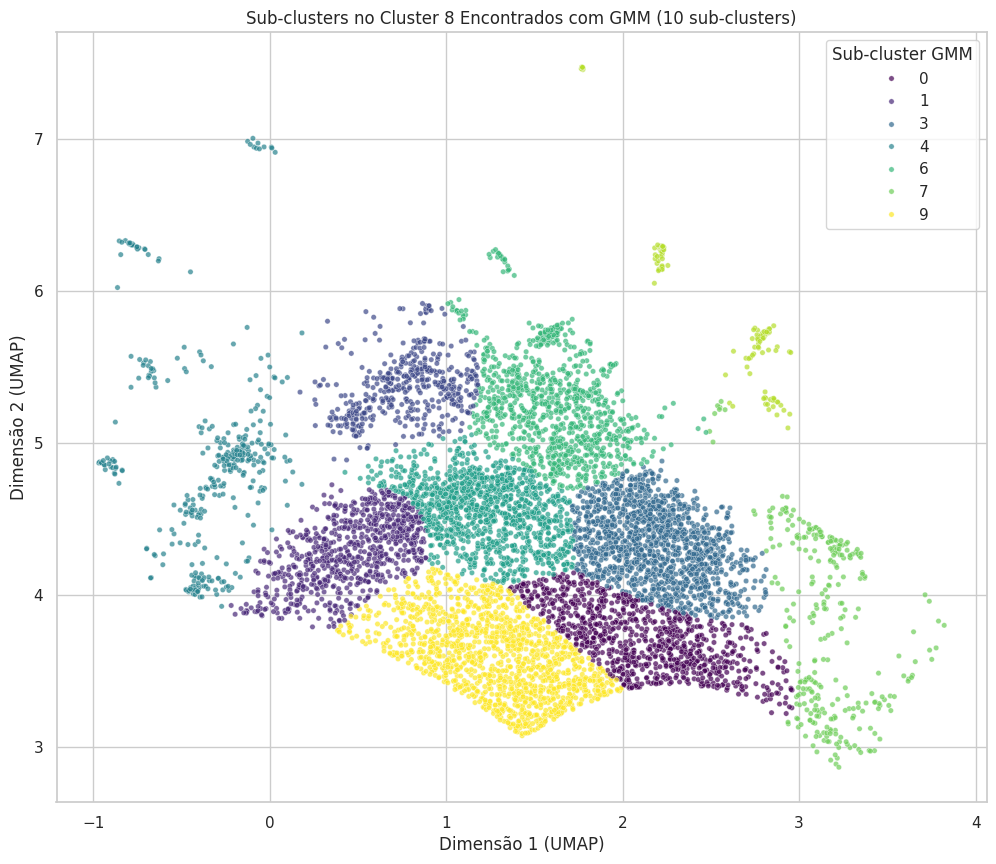

In [48]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("--- Encontrando o maior cluster do resultado do GMM ---")

cluster_counts = df['cluster_gmm'].value_counts()

if not cluster_counts.empty:
    largest_cluster_id = cluster_counts.idxmax()
    print(f"O maior cluster é o {largest_cluster_id}, com {cluster_counts.max()} pontos.")

    df_largest_cluster = df[df['cluster_gmm'] == largest_cluster_id].copy()
    print(f"DataFrame filtrado para o Cluster {largest_cluster_id} criado.")

    embeddings_largest_cluster = df_largest_cluster[['umap_x', 'umap_y']].values

    print("\n--- Aplicando um novo GMM para encontrar sub-clusters ---")

    print("Buscando o número ideal de sub-clusters com BIC...")
    n_components_range_sub = range(2, 11)
    bic_scores_sub = []
    for n_components in n_components_range_sub:
        gmm_sub = GaussianMixture(n_components=n_components, random_state=42, n_init=10)
        gmm_sub.fit(embeddings_largest_cluster)
        bic_scores_sub.append(gmm_sub.bic(embeddings_largest_cluster))

    melhor_n_sub_clusters = np.argmin(bic_scores_sub) + n_components_range_sub.start
    print(f"-> O número ideal de sub-clusters encontrado foi: {melhor_n_sub_clusters}")

    print(f"Treinando o modelo de sub-cluster com {melhor_n_sub_clusters} componentes...")
    gmm_final_sub = GaussianMixture(n_components=melhor_n_sub_clusters, random_state=42, n_init=10)
    sub_cluster_labels = gmm_final_sub.fit_predict(embeddings_largest_cluster)

    df_largest_cluster['gmm_sub_cluster'] = sub_cluster_labels
    print("\nRótulos de sub-cluster adicionados ao DataFrame.")
    print("\nContagem de pontos por sub-cluster:")
    display(df_largest_cluster['gmm_sub_cluster'].value_counts().sort_index())

    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        data=df_largest_cluster,
        x='umap_x',
        y='umap_y',
        hue='gmm_sub_cluster',
        palette='viridis',
        s=15,
        alpha=0.7
    )
    plt.title(f'Sub-clusters no Cluster {largest_cluster_id} Encontrados com GMM ({melhor_n_sub_clusters} sub-clusters)')
    plt.xlabel('Dimensão 1 (UMAP)')
    plt.ylabel('Dimensão 2 (UMAP)')
    plt.legend(title='Sub-cluster GMM')
    plt.grid(True)
    plt.show()

else:
    print("Não foram encontrados clusters no resultado do GMM.")